# Procesamiento de imagen y vídeo
## Croma Key
###### _José Luis Garrido Labrador_

In [1]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
img = cv2.imread('images/imcl27.jpg',1)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

fondo = cv2.imread('images/imcl28.jpg',1)
fondo = cv2.cvtColor(fondo,cv2.COLOR_BGR2RGB)

### Distancia de color

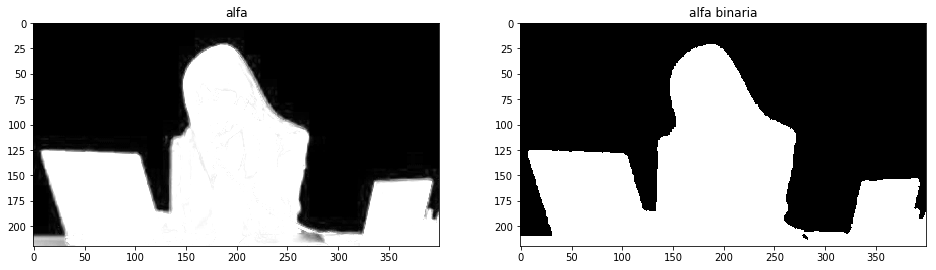

In [3]:
x,y = [0,0]
R,G,B = cv2.split(img)
R = R.astype('float')
G = G.astype('float')
B = B.astype('float')

r = R[x,y]
b = B[x,y]
g = G[x,y]

alfaDS = np.abs(R-r)+np.abs(B-b)+np.abs(G-g)
alfaDS[alfaDS>255] = 255
alfaDS[alfaDS<0] = 0
alfaDS = alfaDS.astype('uint8')

plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.imshow(alfaDS,cmap='gray')
plt.title('alfa')
l,alfaDS = cv2.threshold(alfaDS,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.subplot(1,2,2)
plt.imshow(alfaDS.astype('uint8'),cmap='gray')
plt.title('alfa binaria')

alfaDS = alfaDS.astype('bool')
alfaDSF = (1-alfaDS).astype('bool')

### Diferencia de color

Text(0.5, 1.0, 'alfa binaria correcta')

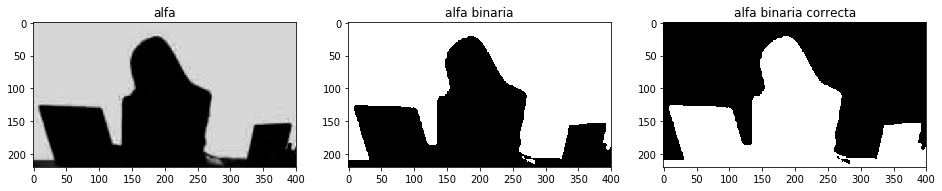

In [4]:
## Normalizador
#img = cv2.normalize(rgb.astype('float'),None,0.0,255.0,cv2.NORM_MINMAX)
#plt.imshow(img)
imgF = img.astype('float')
R,G,B = cv2.split(imgF)
M = G - np.maximum(R,B)
M[M<0]=0
M[M>255]=255
M = M.astype('uint8')

#Binarización,
l,alfa = cv2.threshold(M,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

alfaDF = (255-alfa).astype('bool')
alfaDFF = (1-alfaDF).astype('bool')

plt.figure(figsize=(16,8))
plt.subplot(1,3,1)
plt.imshow(M,cmap='gray')
plt.title('alfa')
plt.subplot(1,3,2)
plt.imshow(alfaDFF,cmap='gray')
plt.title('alfa binaria')
plt.subplot(1,3,3)
plt.imshow(alfaDF,cmap='gray')
plt.title('alfa binaria correcta')


### Adición

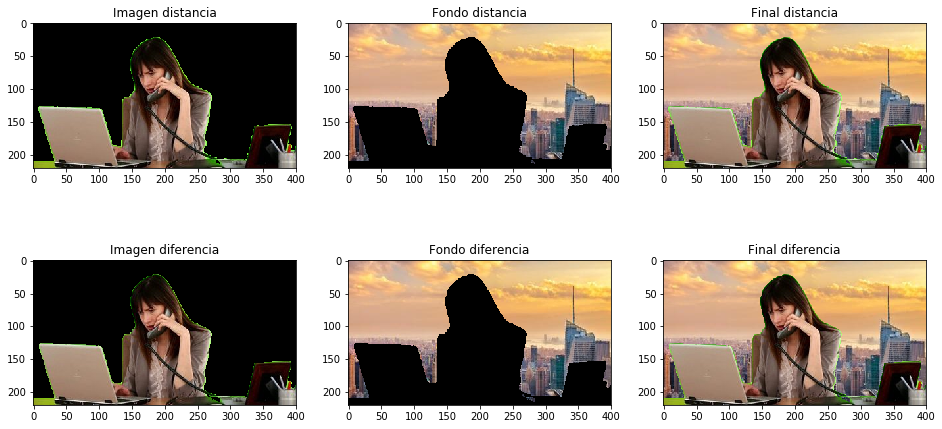

In [5]:
dsF = np.stack((alfaDSF,alfaDSF,alfaDSF),axis=2)*fondo
dsI = np.stack((alfaDS,alfaDS,alfaDS),axis=2)*img
dsFinal = dsF+dsI

dfF = np.stack((alfaDFF,alfaDFF,alfaDFF),axis=2)*fondo
dfI = np.stack((alfaDF,alfaDF,alfaDF),axis=2)*img
dfFinal = dfF+dfI


plt.figure(figsize=(16,8))
images = [dsI,dsF,dsFinal,dfI,dfF,dfFinal]
titles = ['Imagen distancia','Fondo distancia','Final distancia','Imagen diferencia','Fondo diferencia','Final diferencia']

for i in range(len(images)):
    plt.subplot(2,3,i+1)
    plt.imshow(images[i],cmap='gray')
    plt.title(titles[i])

